In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#Exploratory Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

In [4]:
data = pd.read_csv('out.csv')
data.head()

,type,posts
0,INFJ,moment sportscent top ten play prank lifechang...
1,ENTP,find lack post alarmingsex bore posit often ex...
2,INTP,good one cours say know bless curs absolut pos...
3,INTJ,dear enjoy convers day esoter gab natur univer...
4,ENTJ,fire anoth silli misconcept approach logic go ...


In [16]:
data.isnull().any()  #Checking if there are any missing or null values present in the dataset (exploratory data analysis)

type     False
posts    False
dtype: bool

In [17]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')      #size of the dataset

There are 8675 rows and 2 columns


In [18]:
data.dtypes  #Dataset Information

type     object
posts    object
dtype: object

In [19]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [20]:
data.describe(include=['object'])

,type,posts
count,8675,8675
unique,16,8675
top,INFP,also long natur hair never dy hair hair super ...
freq,1832,1


In [21]:
types = np.unique(np.array(data['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [22]:
total = data.groupby(['type']).count()*50
total

,posts
type,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


In [23]:
data.nunique()

type       16
posts    8675
dtype: int64

In [12]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Visualization for text
from PIL import Image
from os import path
import os
import random
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#I will use countplots to visualize most frequent types and also try to visualize the same based on the associted pieces of text's lenghts.

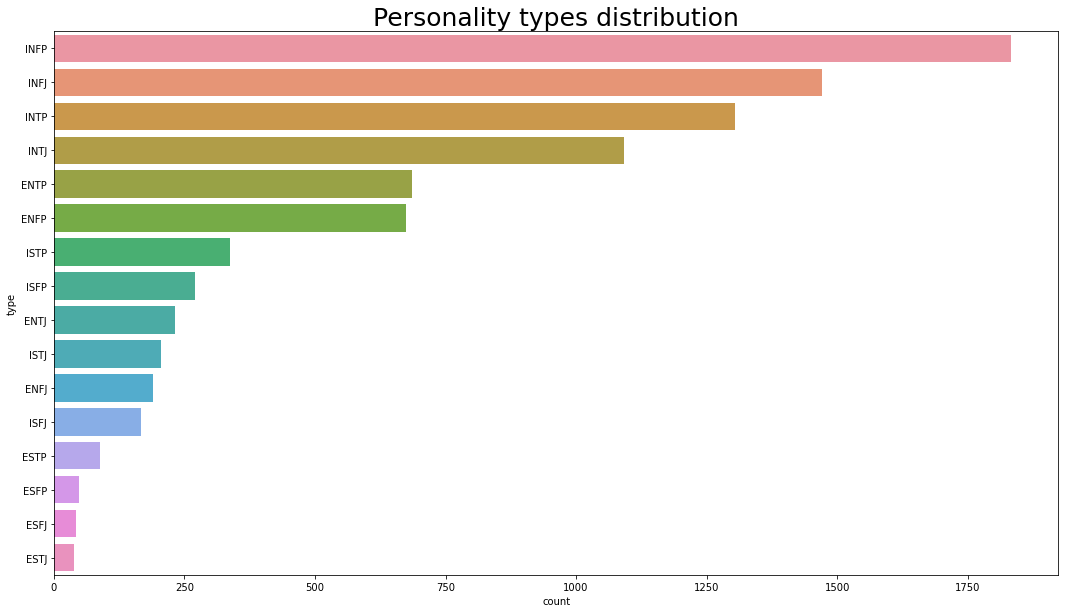

In [28]:
plt.figure(figsize=(18,10))
sns.countplot(y='type',data=data, order=data.type.value_counts().index)
sns.set_context('talk')
plt.title('Personality types distribution', fontsize=25)
plt.savefig('mbti_count.png')
plt.show()

In [ ]:
#This shows how long posts are for each personality type

In [29]:
def var_row(row):
    lst = []
    for word in row.split('|||'):
        lst.append(len(word.split()))
    return np.var(lst)

data['words_per_comment'] = data['posts'].apply(lambda x: len(x.split())/50)
data['variance_of_word_counts'] = data['posts'].apply(lambda x: var_row(x))
data.head()

,type,posts,words_per_comment,variance_of_word_counts
0,INFJ,moment sportscent top ten play prank lifechang...,5.56,0.0
1,ENTP,find lack post alarmingsex bore posit often ex...,10.70,0.0
2,INTP,good one cours say know bless curs absolut pos...,8.20,0.0
3,INTJ,dear enjoy convers day esoter gab natur univer...,9.92,0.0
4,ENTJ,fire anoth silli misconcept approach logic go ...,9.18,0.0


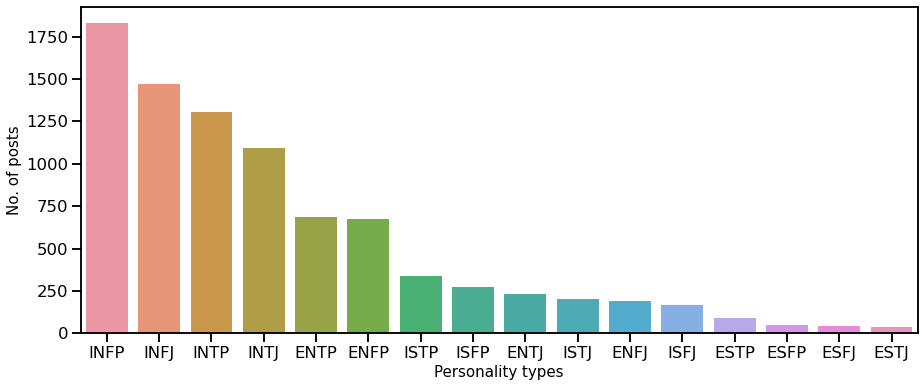

In [35]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

graph = datafcopy['type'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(graph.index, graph.values, alpha=1)
plt.xlabel('Personality types', fontsize=15)
plt.ylabel('No. of posts', fontsize=15)
plt.show()

In [ ]:
#Above we can see that there is great unbalance in Introvert/Extrovert and Intuition/Sensing pairs. 
#Whereas Feeling/Thinking and Perception/Judgment pairs are quite balanced. 

In [38]:
data.head()

,type,posts,words_per_comment,variance_of_word_counts,LenP,NumPosts
0,INFJ,moment sportscent top ten play prank lifechang...,5.56,0.0,1759,1
1,ENTP,find lack post alarmingsex bore posit often ex...,10.70,0.0,3209,1
2,INTP,good one cours say know bless curs absolut pos...,8.20,0.0,2562,1
3,INTJ,dear enjoy convers day esoter gab natur univer...,9.92,0.0,3040,1
4,ENTJ,fire anoth silli misconcept approach logic go ...,9.18,0.0,2863,1
